In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("listings.csv")

In [2]:
#Showing a sample of the df
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,31840,Serviced apartment in Florence · ★4.66 · 1 bed...,380378,Officina 360,NaN,Centro Storico,43.77709,11.25216,Private room,158,1,124,2023-03-01,0.78,27,322,2,NaN
1,32120,Rental unit in Florence · ★4.88 · 1 bedroom · ...,99235,Lucia,NaN,Gavinana Galluzzo,43.76157,11.27741,Entire home/apt,85,1,25,2023-06-18,0.16,1,62,5,NaN
2,32180,Condo in Florence · ★4.79 · 2 bedrooms · 4 bed...,13925330,Cesare,NaN,Centro Storico,43.76832,11.24348,Entire home/apt,105,6,29,2023-06-01,0.18,2,117,7,NaN
3,32395,Bed and breakfast in Florence · ★4.84 · 1 bedr...,140170,Fabio,NaN,Centro Storico,43.76268,11.24149,Hotel room,70,1,643,2023-06-06,4.10,5,35,81,06139100488
4,39115,Home in Florence · ★4.57 · 1 bedroom · 2 beds ...,167739,Lorenzo,NaN,Centro Storico,43.77525,11.25258,Private room,89,2,68,2023-05-18,0.44,11,282,13,NaN


In [3]:
#Getting important information about the df
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11799 entries, 0 to 11798
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11799 non-null  int64  
 1   name                            11799 non-null  object 
 2   host_id                         11799 non-null  int64  
 3   host_name                       11799 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11799 non-null  object 
 6   latitude                        11799 non-null  float64
 7   longitude                       11799 non-null  float64
 8   room_type                       11799 non-null  object 
 9   price                           11799 non-null  int64  
 10  minimum_nights                  11799 non-null  int64  
 11  number_of_reviews               11799 non-null  int64  
 12  last_review                     

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.179900e+04,1.179900e+04,0.0,11799.000000,11799.000000,11799.00000,11799.000000,11799.000000,10241.000000,11799.000000,11799.000000,11799.000000
mean,2.382020e+17,1.356781e+08,NaN,43.774063,11.253651,241.90067,4.391559,60.659632,1.802153,14.533689,162.055767,16.362065
std,3.583208e+17,1.564178e+08,NaN,0.009430,0.016108,1523.89581,31.453940,97.195092,1.813468,35.414364,117.497578,21.743167
min,3.184000e+04,1.565100e+04,NaN,43.726070,11.159850,9.00000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.738811e+07,1.556934e+07,NaN,43.768695,11.245650,90.00000,1.000000,3.000000,0.410000,1.000000,51.000000,0.000000
50%,3.838132e+07,6.070689e+07,NaN,43.772560,11.254020,140.00000,2.000000,19.000000,1.190000,3.000000,162.000000,7.000000
75%,6.460491e+17,2.208618e+08,NaN,43.778080,11.261380,221.00000,3.000000,74.000000,2.710000,9.000000,266.000000,25.000000
max,9.186846e+17,5.204510e+08,NaN,43.830530,11.336160,95195.00000,1125.000000,997.000000,21.000000,209.000000,365.000000,142.000000


In [4]:
#Starting pre processing

#Dropping unseful and empty columns
df=df.drop(columns=["name","host_id","host_name",'neighbourhood_group',"license","last_review"])

df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11799 entries, 0 to 11798
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11799 non-null  int64  
 1   neighbourhood                   11799 non-null  object 
 2   latitude                        11799 non-null  float64
 3   longitude                       11799 non-null  float64
 4   room_type                       11799 non-null  object 
 5   price                           11799 non-null  int64  
 6   minimum_nights                  11799 non-null  int64  
 7   number_of_reviews               11799 non-null  int64  
 8   reviews_per_month               10241 non-null  float64
 9   calculated_host_listings_count  11799 non-null  int64  
 10  availability_365                11799 non-null  int64  
 11  number_of_reviews_ltm           11799 non-null  int64  
dtypes: float64(3), int64(7), object(

,id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,31840,Centro Storico,43.77709,11.25216,Private room,158,1,124,0.78,27,322,2
1,32120,Gavinana Galluzzo,43.76157,11.27741,Entire home/apt,85,1,25,0.16,1,62,5
2,32180,Centro Storico,43.76832,11.24348,Entire home/apt,105,6,29,0.18,2,117,7
3,32395,Centro Storico,43.76268,11.24149,Hotel room,70,1,643,4.10,5,35,81
4,39115,Centro Storico,43.77525,11.25258,Private room,89,2,68,0.44,11,282,13


In [5]:
#filling nan values
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11799 entries, 0 to 11798
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11799 non-null  int64  
 1   neighbourhood                   11799 non-null  object 
 2   latitude                        11799 non-null  float64
 3   longitude                       11799 non-null  float64
 4   room_type                       11799 non-null  object 
 5   price                           11799 non-null  int64  
 6   minimum_nights                  11799 non-null  int64  
 7   number_of_reviews               11799 non-null  int64  
 8   reviews_per_month               11799 non-null  float64
 9   calculated_host_listings_count  11799 non-null  int64  
 10  availability_365                11799 non-null  int64  
 11  number_of_reviews_ltm           11799 non-null  int64  
dtypes: float64(3), int64(7), object(

In [6]:
#Checking Object data info
print(df["neighbourhood"].value_counts())
print(df["room_type"].value_counts())

neighbourhood
Centro Storico       8759
Campo di Marte       1168
Rifredi               949
Isolotto Legnaia      501
Gavinana Galluzzo     422
Name: count, dtype: int64
room_type
Entire home/apt    9363
Private room       2258
Hotel room          136
Shared room          42
Name: count, dtype: int64


In [7]:
#Label encoding of object data
lEncodeddf = pd.get_dummies(df,drop_first=True)
lEncodeddf.head()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,neighbourhood_Centro Storico,neighbourhood_Gavinana Galluzzo,neighbourhood_Isolotto Legnaia,neighbourhood_Rifredi,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,31840,43.77709,11.25216,158,1,124,0.78,27,322,2,True,False,False,False,False,True,False
1,32120,43.76157,11.27741,85,1,25,0.16,1,62,5,False,True,False,False,False,False,False
2,32180,43.76832,11.24348,105,6,29,0.18,2,117,7,True,False,False,False,False,False,False
3,32395,43.76268,11.24149,70,1,643,4.10,5,35,81,True,False,False,False,True,False,False
4,39115,43.77525,11.25258,89,2,68,0.44,11,282,13,True,False,False,False,False,True,False


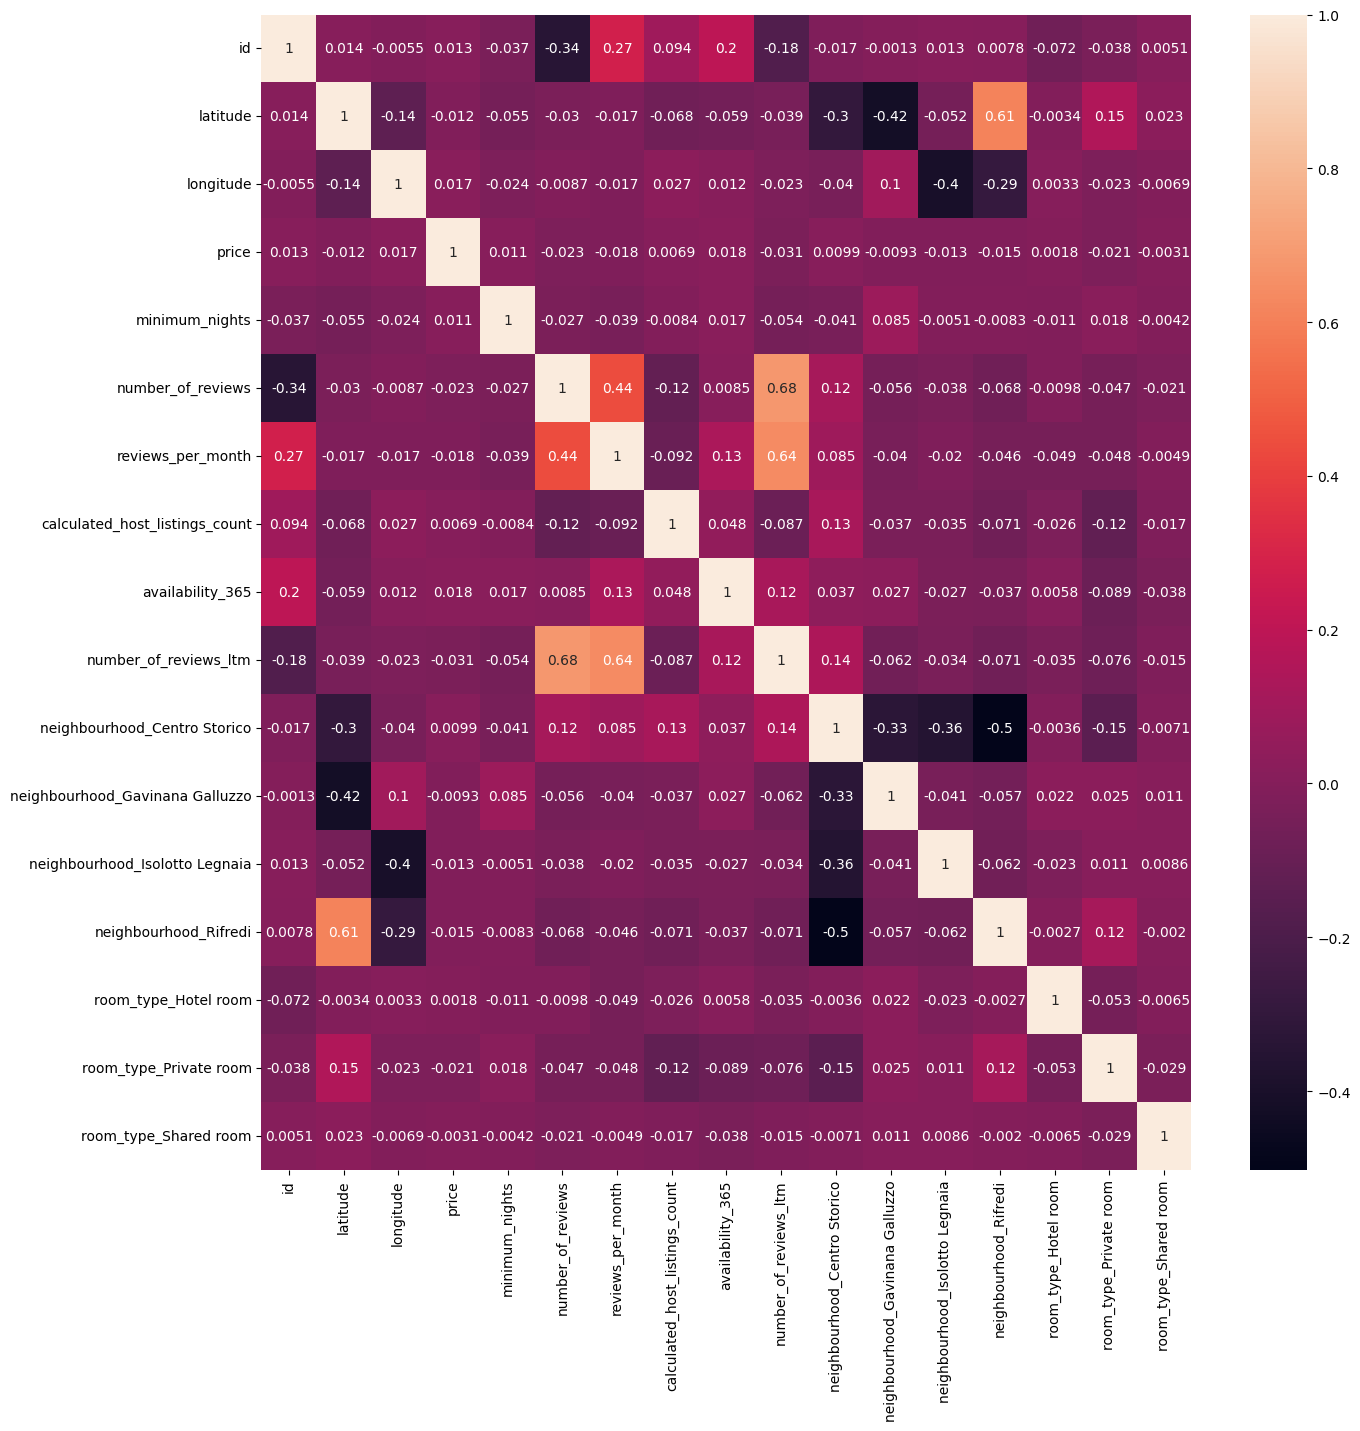

In [8]:
#Plotting a heat map which shows relationship betweern columns
plt.figure(figsize=(15,15))
sns.heatmap(data=lEncodeddf.corr(),annot=True)
plt.show()

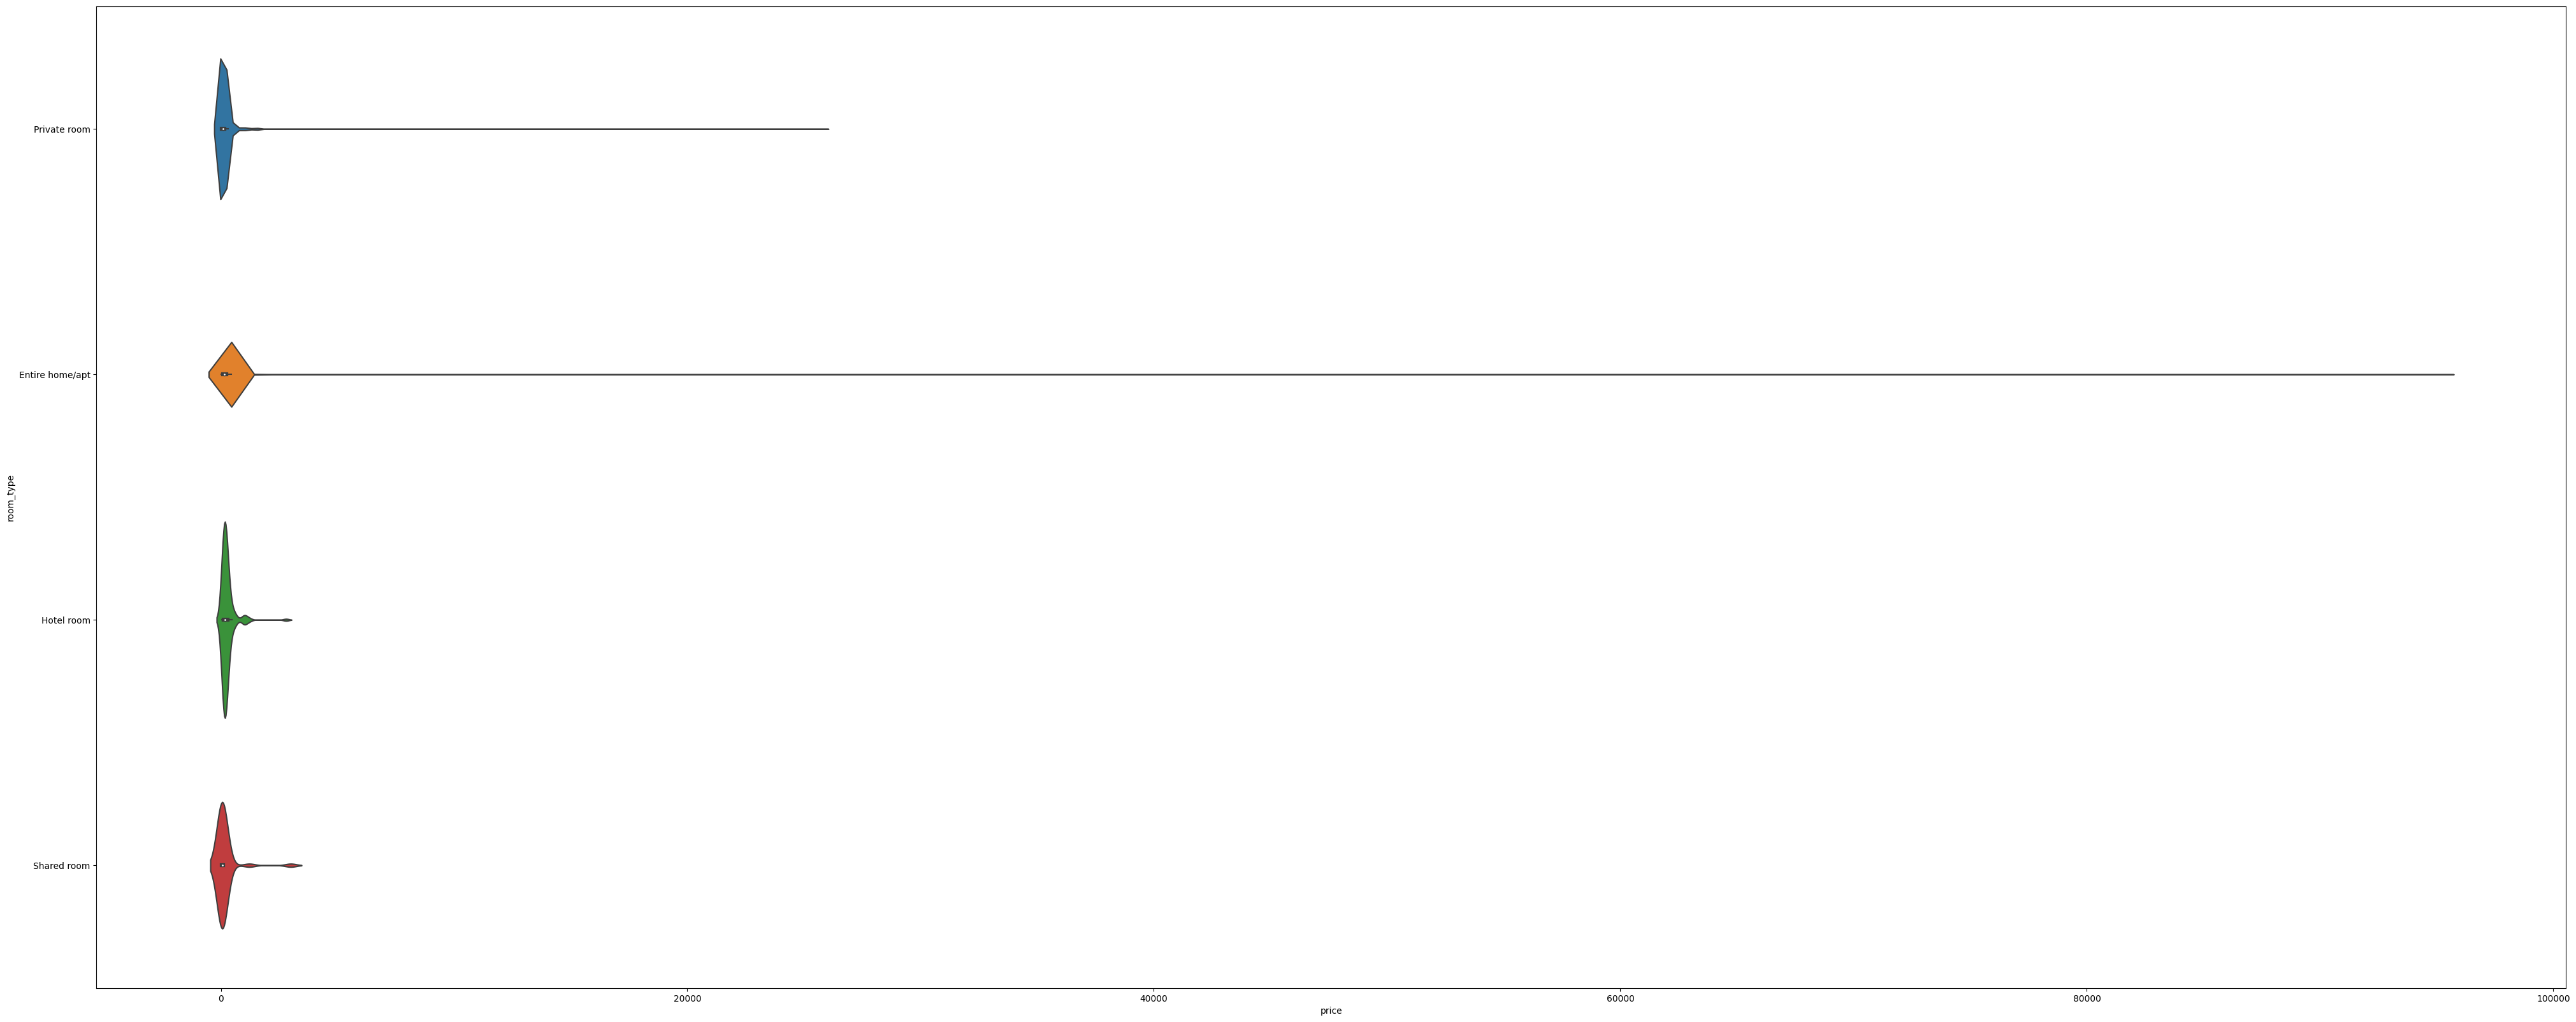

In [9]:
#Examining the relatioship between price and room_type
plt.figure(figsize=(50,20))
a=sns.violinplot(x=df["price"],y=df["room_type"])

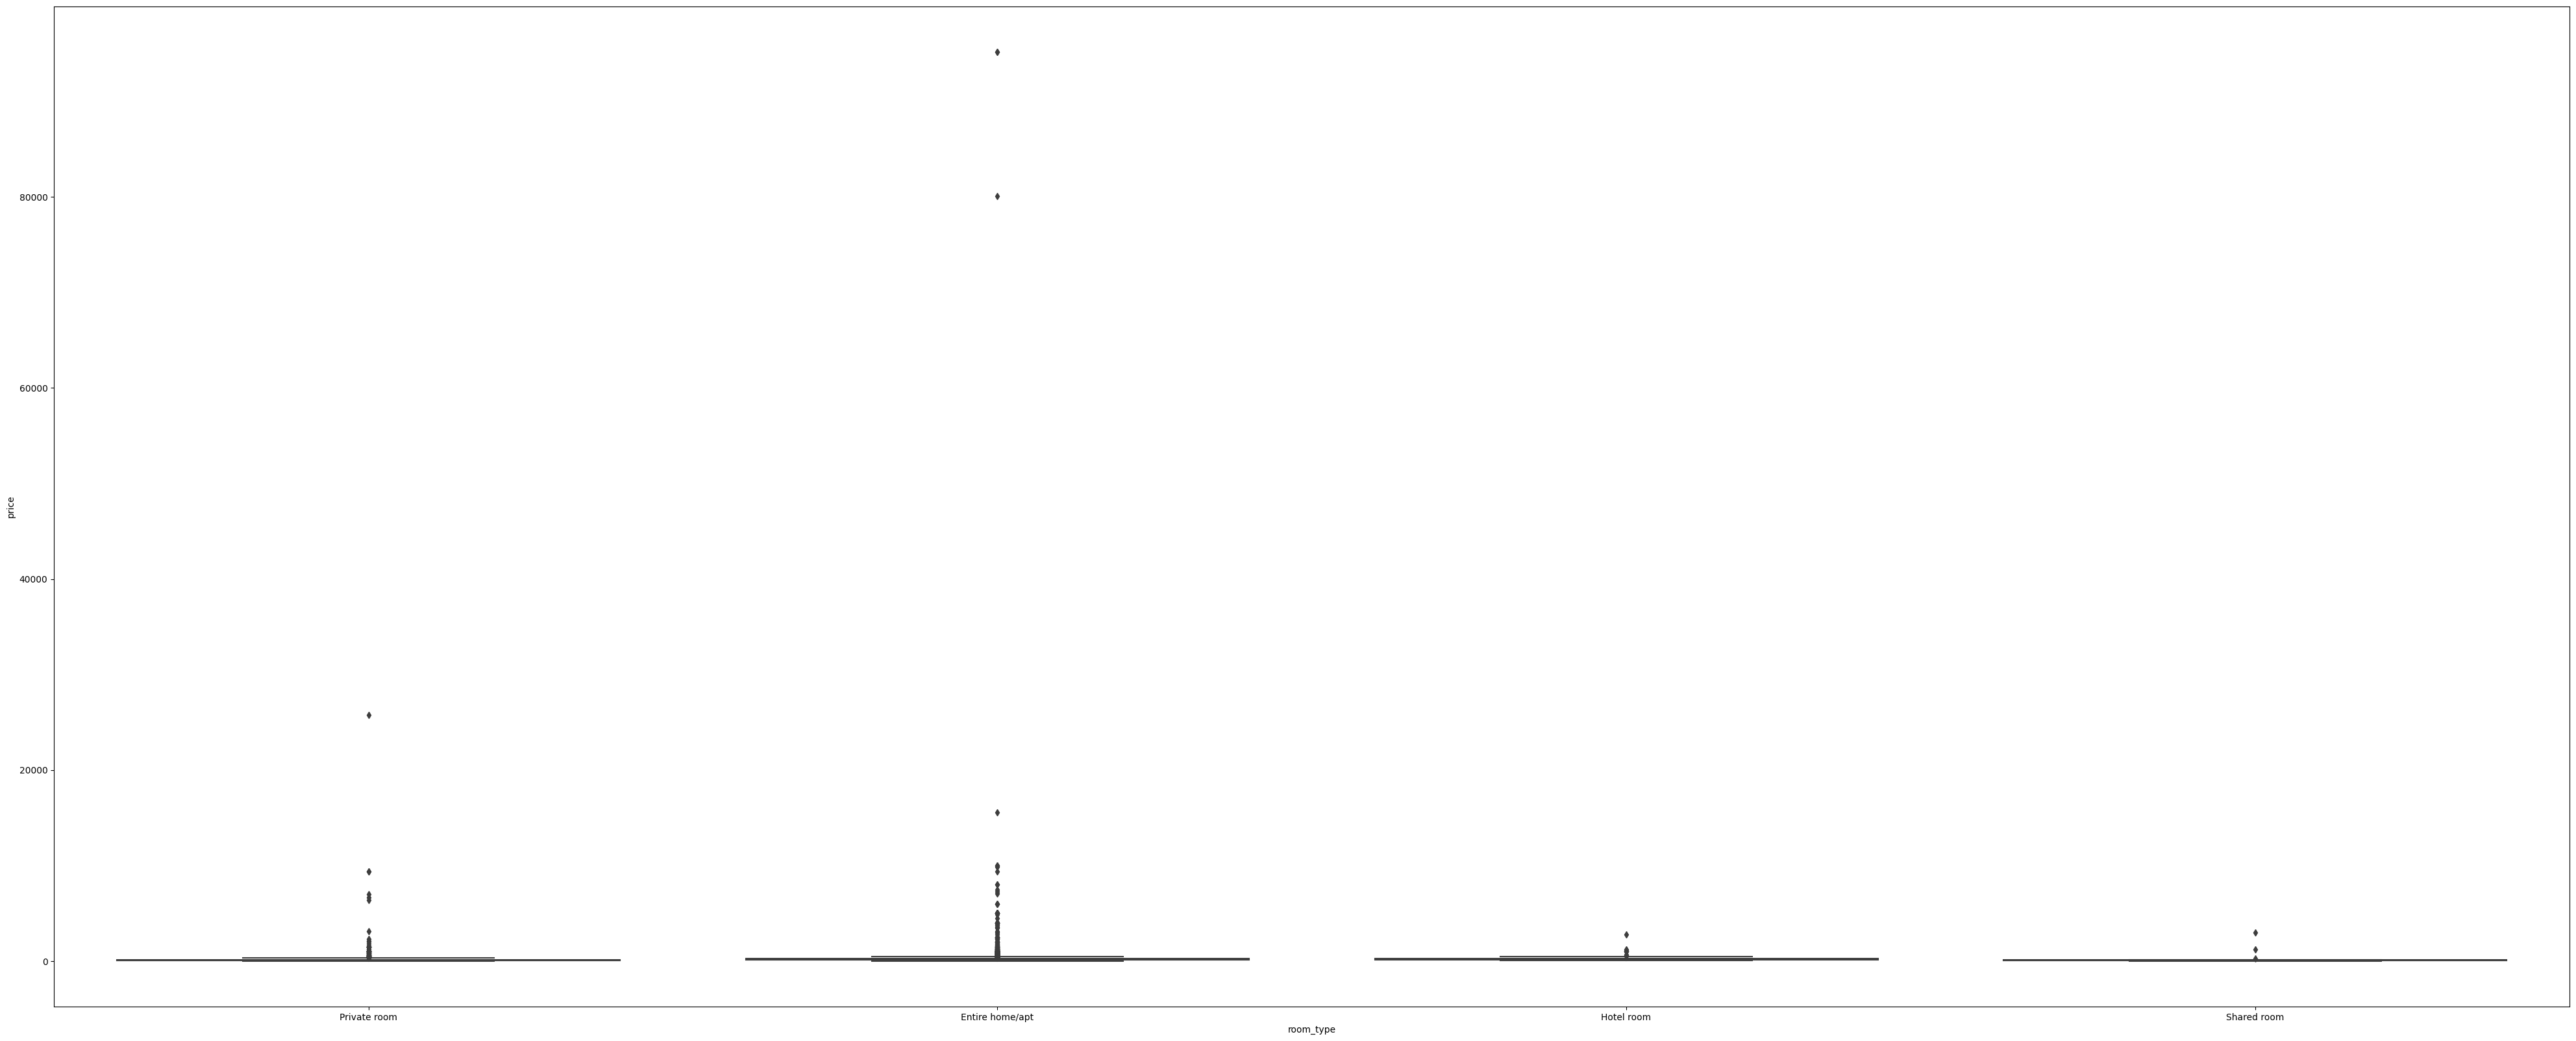

In [10]:
plt.figure(figsize=(50,20))
a=sns.boxplot(x=df["room_type"],y=df["price"])

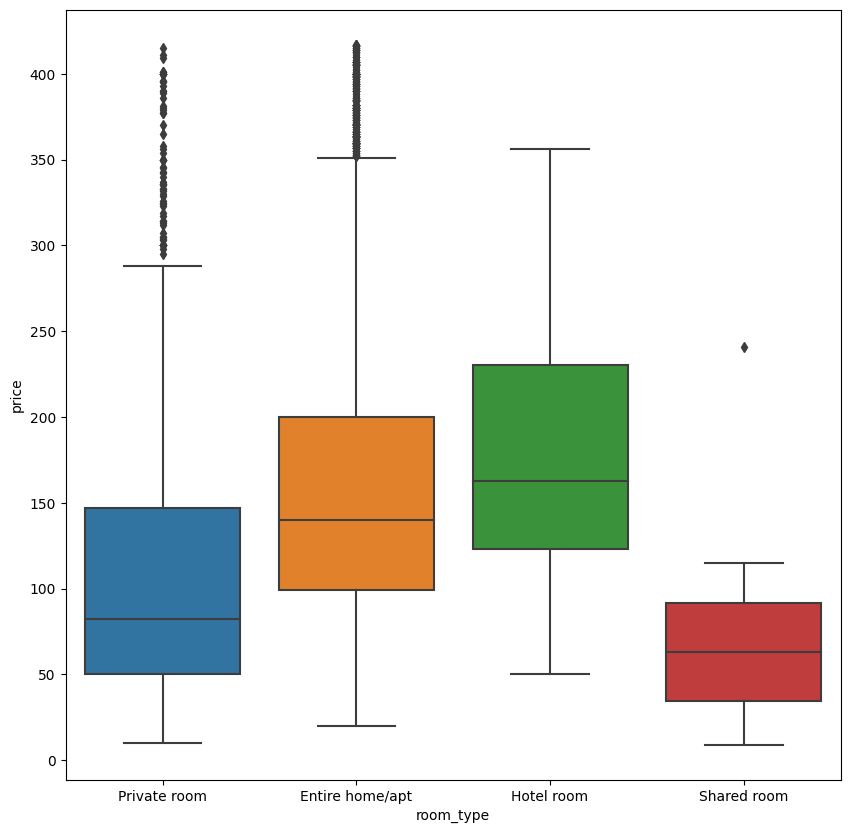

In [11]:
#Dealing with outlier values and replotting
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df = df[df["price"]< Upper_Whisker]
plt.figure(figsize=(10,10))
a=sns.boxplot(x=df["room_type"],y=df["price"])
#It shows us that hotel rooms usually are more expensive

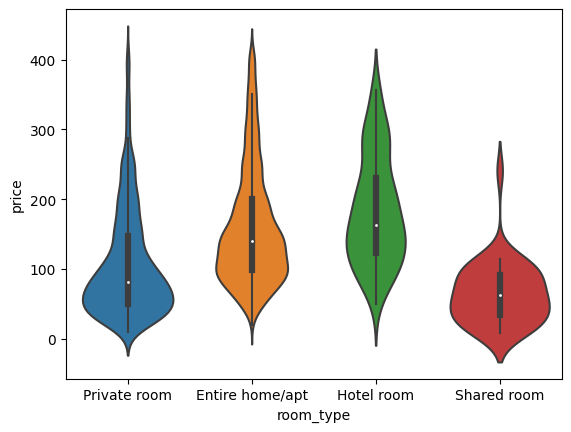

In [12]:
a=sns.violinplot(x=df["room_type"],y=df["price"])

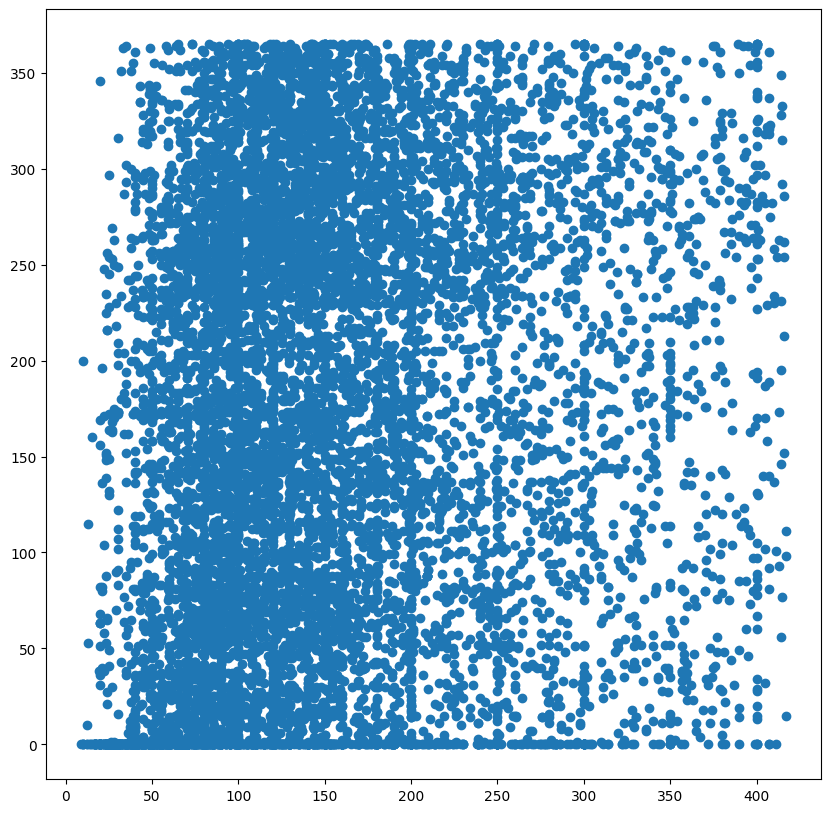

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(df["price"],df["availability_365"])

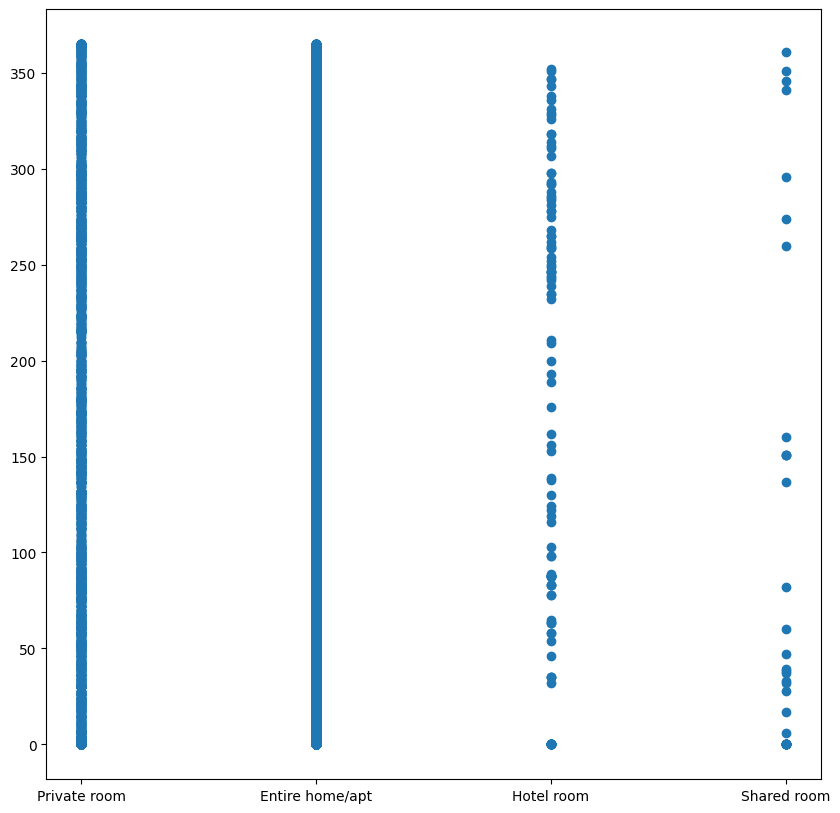

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(df["room_type"],df["availability_365"])
#private rooms and entire homes are usually more available than hotel and shared rooms

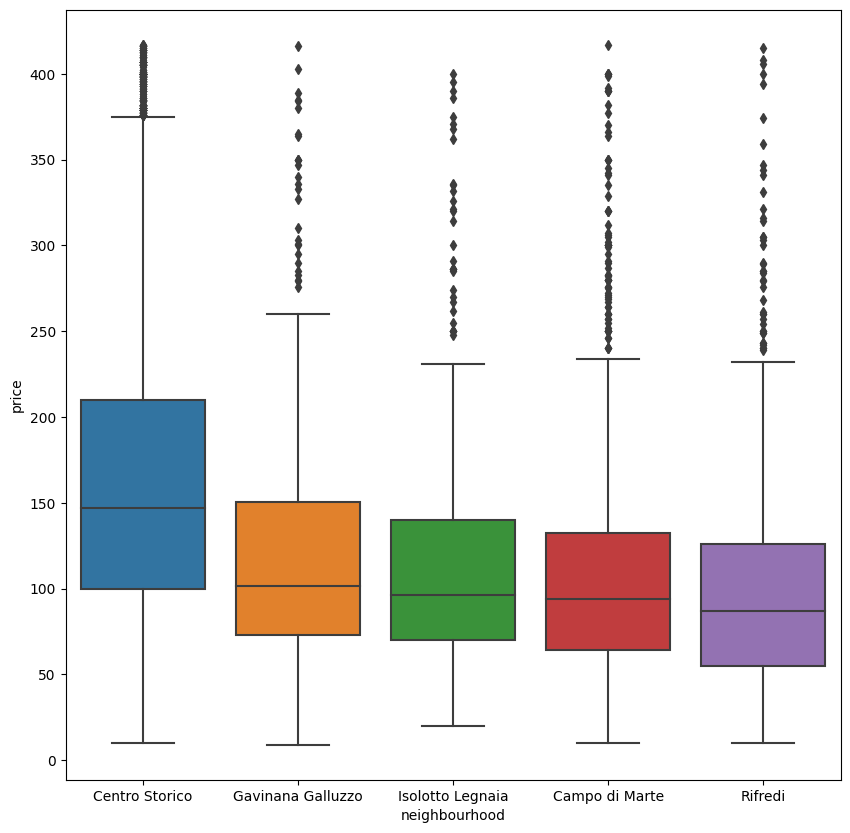

In [15]:
plt.figure(figsize=(10,10))
a=sns.boxplot(x=df["neighbourhood"],y=df["price"])
#Centro Storico is th most expensive neighbohood followed by gavianna galluzo